## Build ACH Model - OOS
---

In [1]:
import os, sys, json
import pickle as pkl
import pandas as pd

from rdsutils import datagen
import rdsutils.plot as rdsplot
from rdsutils.lightgbm_helpers import train_lgb_baseline_grouped
from utils import preprocess

%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings(action='ignore')

In [2]:
modeling_df = pd.read_parquet('../../artifacts/final/modeling_df_w_baselines.parquet')
test_df = pd.read_parquet('../../artifacts/final/test_df_w_baselines.parquet')
modeling_df.shape, test_df.shape

((112599, 236), (152951, 236))

In [3]:
modeling_df_cleaned = modeling_df.copy()
modeling_df_cleaned = preprocess(modeling_df_cleaned)

In [4]:
seed = 12345
target_col = 'ach_target'

In [5]:
display(modeling_df[target_col].value_counts(), 
        test_df[target_col].value_counts())

False    108825
True       3774
Name: ach_target, dtype: int64

False    145410
True       7541
Name: ach_target, dtype: int64

### Final 
---
#### Feature Cleaned

In [6]:
features = pkl.load(open('../../artifacts/final/features_corr_removed.pkl', 'rb'))
with open('../../artifacts/final/final_params_cleaned.json', 'r') as f:
    params_cleaned = json.load(f)
params_cleaned

{'num_boost_round': 215,
 'num_threads': 16,
 'objective': 'binary',
 'verbose': -1,
 'boosting_type': 'gbdt',
 'two_round': True,
 'metric': 'auc',
 'boosting': 'gbdt',
 'tree_learner': 'feature',
 'boost_from_average': 'false',
 'num_leaves': 52,
 'lambda_l1': 30.0,
 'lambda_l2': 50.0,
 'min_data_in_leaf': 121,
 'max_depth': 5,
 'learning_rate': 0.1,
 'feature_fraction': 0.8,
 'scale_pos_weight': 28.835453100158983,
 'early_stopping_round': 300,
 'seed': 12345,
 'seed_value': 12345}

In [7]:
pred_cleaned, fimp_cleaned, models_cleaned, auc_cleaned = train_lgb_baseline_grouped(modeling_df_cleaned, features, 
                                                     params_cleaned, target_col, seed=seed)
# evaluate on modeling_df
modeling_df['ach_pred_cleaned'] = pred_cleaned

[LightGBM] [Warning] Unknown parameter: seed_value
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
Training until validation scores don't improve for 300 rounds
Did not meet early stopping. Best iteration is:
[215]	train's auc: 0.983934	test's auc: 0.925347
[LightGBM] [Warning] Unknown parameter: seed_value
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
Training until validation scores don't improve for 300 rounds
Did not meet early stopping. Best iteration is:
[215]	train's auc: 0.983042	test's auc: 0.930794
[LightGBM] [Warning] Unknown parameter: seed_value
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
Training until validation scores don't improve for 300 rounds
Did not meet early stopping. Best iteration is:
[215]	train's auc: 0.983804	test's auc: 0.927022
[LightGBM] [Warning] Unknown parameter: seed_v

(<Figure size 648x504 with 1 Axes>,
 <AxesSubplot:title={'center':'Feature Importance (avg over folds)'}, xlabel='importance', ylabel='feature'>)

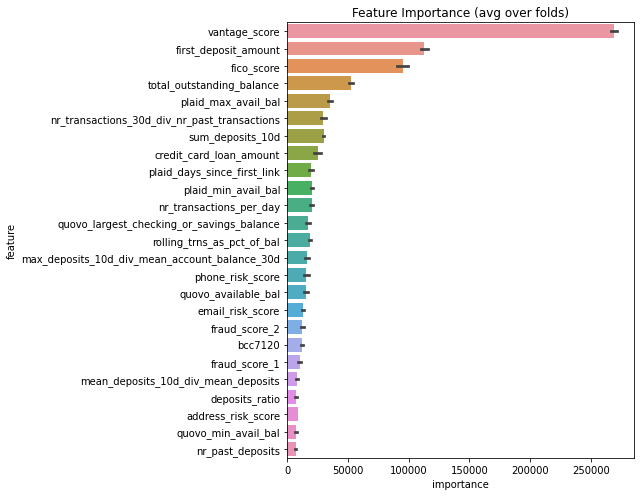

In [8]:
rdsplot.display_feature_importance(fimp_cleaned.feature, 
                                   fimp_cleaned.importance,
                                   max_n_features=-1)

<AxesSubplot:>

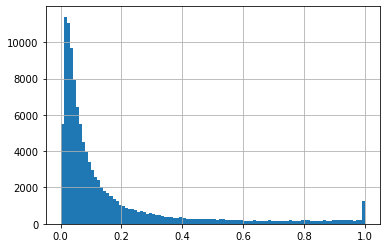

In [9]:
modeling_df['ach_pred_cleaned'].hist(bins=100)

#### Uncleaned Features
---

In [10]:
with open('../../artifacts/final/final_params.json', 'r') as f:
    params = json.load(f)

params['metric'] = 'auc'    
params['seed_value'] = 12345

In [11]:
pred, fimp, models, auc = train_lgb_baseline_grouped(modeling_df, features, 
                                                     params, target_col, seed=seed)
modeling_df['ach_pred'] = pred

[LightGBM] [Warning] Unknown parameter: seed_value
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.955312	test's auc: 0.924525
[1000]	train's auc: 0.96964	test's auc: 0.92491
[1500]	train's auc: 0.977643	test's auc: 0.923907
Early stopping, best iteration is:
[595]	train's auc: 0.959027	test's auc: 0.925512
[LightGBM] [Warning] Unknown parameter: seed_value
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.954066	test's auc: 0.927502
[1000]	train's auc: 0.968556	test's auc: 0.929725
[1500]	train's auc: 0.976962	test's auc: 0.929257
Early stopping, best iteration is:
[929]	train's auc: 0.96708	test's auc: 0.929963
[LightGBM] [Warning] Unknown parameter: seed_value
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.954785	test's auc: 0.927734
[1000]	train's auc: 0.969005	test's auc: 0.926849
[1500]	train's auc: 0.977705	test's auc: 0.926332
Early stopping, best iteration is:
[513]	train

(<Figure size 648x504 with 1 Axes>,
 <AxesSubplot:title={'center':'Feature Importance (avg over folds)'}, xlabel='importance', ylabel='feature'>)

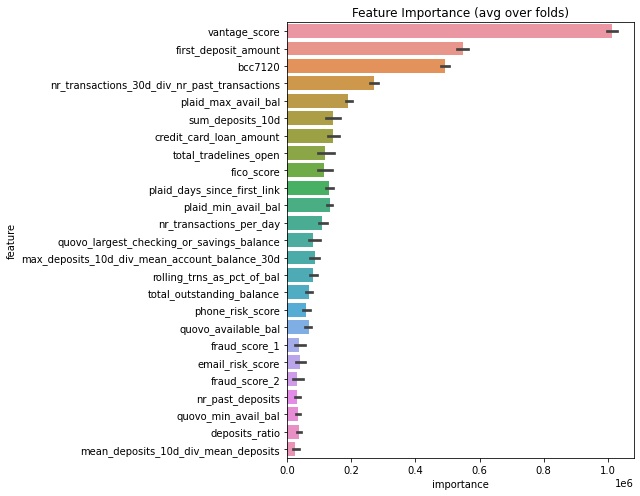

In [12]:
rdsplot.display_feature_importance(fimp.feature, 
                                   fimp.importance,
                                   max_n_features=-1)

<AxesSubplot:>

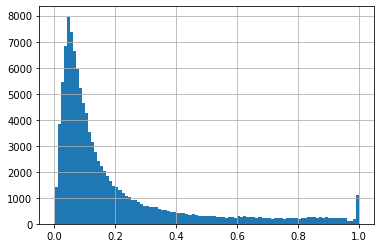

In [13]:
modeling_df['ach_pred'].hist(bins=100)

#### with Extra Features
---

In [14]:
features = pkl.load(open('../../artifacts/final/features_corr_removed.pkl', 'rb'))

features = list(set(features+['max_deposits_last_3',
                             'deposits_trend_ratio_short1',
                             'deposits_trend_ratio_mid2']))

with open('../../artifacts/final/final_params_cleaned.json', 'r') as f:
    params_cleaned = json.load(f)
params_cleaned

{'num_boost_round': 215,
 'num_threads': 16,
 'objective': 'binary',
 'verbose': -1,
 'boosting_type': 'gbdt',
 'two_round': True,
 'metric': 'auc',
 'boosting': 'gbdt',
 'tree_learner': 'feature',
 'boost_from_average': 'false',
 'num_leaves': 52,
 'lambda_l1': 30.0,
 'lambda_l2': 50.0,
 'min_data_in_leaf': 121,
 'max_depth': 5,
 'learning_rate': 0.1,
 'feature_fraction': 0.8,
 'scale_pos_weight': 28.835453100158983,
 'early_stopping_round': 300,
 'seed': 12345,
 'seed_value': 12345}

In [15]:
pred, fimp, models, auc = train_lgb_baseline_grouped(modeling_df_cleaned, features, 
                                                     params, target_col, seed=seed)
# evaluate on modeling_df
modeling_df['ach_pred_new_features'] = pred

[LightGBM] [Warning] Unknown parameter: seed_value
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.95581	test's auc: 0.92626
[1000]	train's auc: 0.970611	test's auc: 0.927784
[1500]	train's auc: 0.978664	test's auc: 0.92699
Did not meet early stopping. Best iteration is:
[1956]	train's auc: 0.983445	test's auc: 0.925372
[LightGBM] [Warning] Unknown parameter: seed_value
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.955405	test's auc: 0.931831
[1000]	train's auc: 0.969668	test's auc: 0.933325
[1500]	train's auc: 0.977926	test's auc: 0.933286
Did not meet early stopping. Best iteration is:
[1956]	train's auc: 0.982941	test's auc: 0.93336
[LightGBM] [Warning] Unknown parameter: seed_value
Training until validation scores don't improve for 1000 rounds
[500]	train's auc: 0.955492	test's auc: 0.928179
[1000]	train's auc: 0.970171	test's auc: 0.928444
[1500]	train's auc: 0.978413	test's auc: 0.927855
Early stopping, bes

### With Constraints
---

In [16]:
features = pkl.load(open('../../artifacts/final/features_corr_removed.pkl', 'rb'))
with open('../../artifacts/final/final_params_cleaned.json', 'r') as f:
    params = json.load(f)
params['lambda_l1'] = 15
params['lambda_l2'] = 15

In [17]:
pos = ['email_risk_score', 'fraud_score_1', 'phone_risk_score', 'fraud_score_2', 'address_risk_score']
pos_candidates = ['deposits_ratio', 'nr_transactions_per_day', 'total_outstanding_balance', 'rolling_trns_as_pct_of_bal', 
                  'sum_deposits_10d', 'max_deposits_10d_div_mean_account_balance_30d', 'nr_transactions_30d_div_nr_past_transactions']
neg = ['vantage_score', 'fico_score', 'bcc7120', 'nr_past_deposits']
neg_candidates = ['first_deposit_amount', 'mean_deposits_10d_div_mean_deposits', 'credit_card_loan_amount',
                  'quovo_available_bal', 'plaid_max_avail_bal', 'quovo_min_avail_bal', 'quovo_largest_checking_or_savings_balance',
                  'total_tradelines_open', 'plaid_min_avail_bal', 'plaid_days_since_first_link']
def get_monotone_constraints(features, pos, neg):
    result = []
    for f in features:
        if f in pos:
            result.append(1)
        elif f in neg:
            result.append(-1)
        else:
            result.append(0)
    return result
params['monotone_constraints'] = get_monotone_constraints(features, pos+pos_candidates, neg+neg_candidates)
params['mc_method'] = 'advanced'

In [18]:
pred_constr, fimp_constr, models_constr, auc_constr = train_lgb_baseline_grouped(modeling_df_cleaned, features, 
                                                     params, target_col, seed=seed)
# evaluate on modeling_df
modeling_df['ach_pred_constrainted'] = pred_constr

[LightGBM] [Warning] Unknown parameter: seed_value
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
Training until validation scores don't improve for 300 rounds
Did not meet early stopping. Best iteration is:
[215]	train's auc: 0.953884	test's auc: 0.920129
[LightGBM] [Warning] Unknown parameter: seed_value
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
Training until validation scores don't improve for 300 rounds
Did not meet early stopping. Best iteration is:
[215]	train's auc: 0.953137	test's auc: 0.91913
[LightGBM] [Warning] Unknown parameter: seed_value
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
Training until validation scores don't improve for 300 rounds
Did not meet early stopping. Best iteration is:
[215]	train's auc: 0.95166	test's auc: 0.925123
[LightGBM] [Warning] Unknown parameter: seed_val

(<Figure size 648x504 with 1 Axes>,
 <AxesSubplot:title={'center':'Feature Importance (avg over folds)'}, xlabel='importance', ylabel='feature'>)

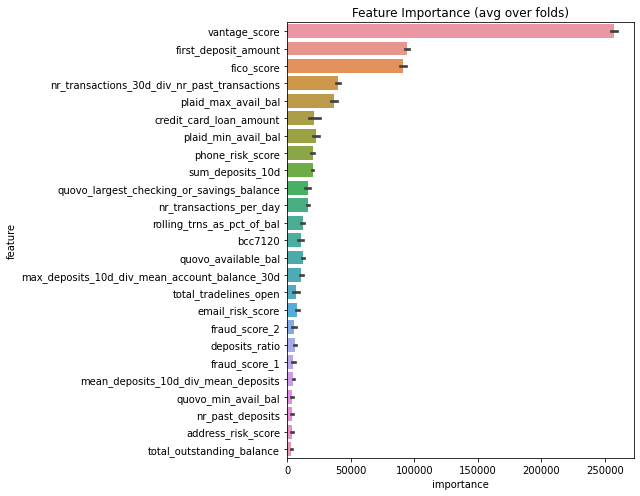

In [19]:
rdsplot.display_feature_importance(fimp_constr.feature, 
                                   fimp_constr.importance,
                                   max_n_features=-1)

### Comparisons
---

In [20]:
import scikitplot as skplt
import matplotlib.pyplot as plt
from rdsutils.plot import plot_auc_curve_mult, plot_pr_curve_mult, plot_feature_over_time

plt.style.use('seaborn')

def get_binary_metrics(y_true, y_pred):
    from sklearn.metrics import roc_auc_score, average_precision_score
    from scikitplot.helpers import binary_ks_curve
    
    auc = round(roc_auc_score(y_true=y_true,
                              y_score=y_pred)*100, 2)
    ap = round(average_precision_score(y_true=y_true,
                                       y_score=y_pred)*100, 2)
    _, _, _, ks, _, _ = binary_ks_curve(y_true=y_true, y_probas=y_pred)
    ks = round(ks*100, 2) 
    
    metrics = {'auc': auc,
               'ap': ap,
               'ks': ks}

    return metrics


def get_pred_reports(df, target_col, pred_cols):
    import pandas as pd
    result = {}
    for col in pred_cols:
        metrics = get_binary_metrics(df[target_col], df[col])
        result[col] = metrics
    return pd.DataFrame(result).T

In [21]:
metrics = get_pred_reports(modeling_df, target_col, 
                           ['deposit_v1_pred', 
                            'customer_pred',
                            'ach_pred', 
                            'ach_pred_cleaned',
                            'ach_pred_constrainted'])
metrics

,auc,ap,ks
deposit_v1_pred,85.06,27.62,56.89
customer_pred,89.19,51.03,65.33
ach_pred,92.87,65.30,73.04
ach_pred_cleaned,92.77,66.28,72.55
ach_pred_constrainted,92.32,62.05,71.44


(<Figure size 576x396 with 1 Axes>,
 <AxesSubplot:title={'center':'Precision-Recall curve: Baseline Comparison'}, xlabel='Recall', ylabel='Precision'>)

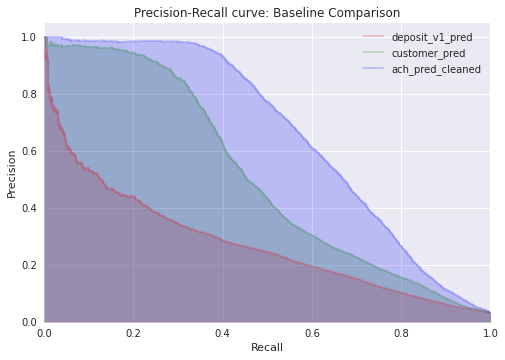

In [22]:
preds = [(modeling_df['deposit_v1_pred'], 'deposit_v1_pred'), 
         (modeling_df['customer_pred'], 'customer_pred'),
         (modeling_df['ach_pred_cleaned'], 'ach_pred_cleaned')]
title = 'Precision-Recall curve: Baseline Comparison'
plot_pr_curve_mult(modeling_df[target_col], preds,
                   title=title, colors = ['r', 'g', 'b']) 

(<Figure size 576x396 with 1 Axes>,
 <AxesSubplot:title={'center':'AUC-ROC curve: Baseline Comparison'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>)

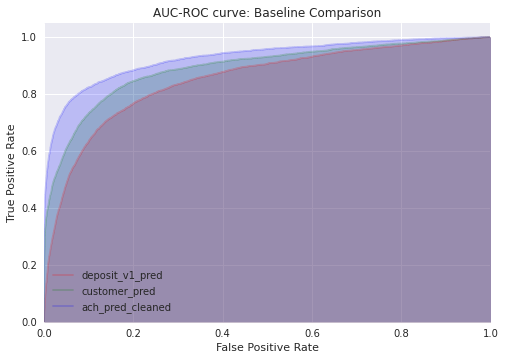

In [23]:
title = 'AUC-ROC curve: Baseline Comparison'
plot_auc_curve_mult(modeling_df[target_col], preds,
                   title=title, colors = ['r', 'g', 'b'])

#### With FICO

In [24]:
df_w_fico = modeling_df[(~modeling_df.fico_score.isna()) 
                        & (modeling_df.fico_score <= 850)]
# logically good fico score -> lower fraud prob
# flip the direction to match with target 

df_w_fico['fico_pred'] = -df_w_fico['fico_score']  
metrics = get_pred_reports(df_w_fico, target_col, 
                           ['fico_pred', 
                            'deposit_v1_pred', 
                            'ach_pred',
                            'ach_pred_cleaned',
                            'ach_pred_constrainted'])
metrics

,auc,ap,ks
fico_pred,85.43,18.12,60.65
deposit_v1_pred,83.74,23.36,54.39
ach_pred,92.16,62.10,71.12
ach_pred_cleaned,92.05,62.85,70.66
ach_pred_constrainted,91.74,58.56,70.01


(<Figure size 576x396 with 1 Axes>,
 <AxesSubplot:title={'center':'Precision-Recall curve: Baseline Comparison'}, xlabel='Recall', ylabel='Precision'>)

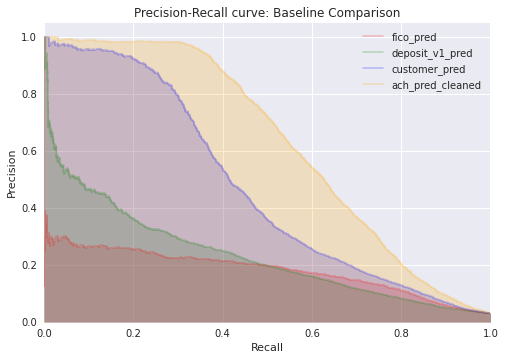

In [25]:
preds = [(df_w_fico['fico_pred'], 'fico_pred'),
         (df_w_fico['deposit_v1_pred'], 'deposit_v1_pred'), 
         (df_w_fico['customer_pred'], 'customer_pred'),
         (df_w_fico['ach_pred_cleaned'], 'ach_pred_cleaned')]
title = 'Precision-Recall curve: Baseline Comparison'
plot_pr_curve_mult(df_w_fico[target_col], preds,
                   title=title, colors = ['r', 'g', 'b', 'orange'])

(<Figure size 576x396 with 1 Axes>,
 <AxesSubplot:title={'center':'AUC-ROC curve: Baseline Comparison'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>)

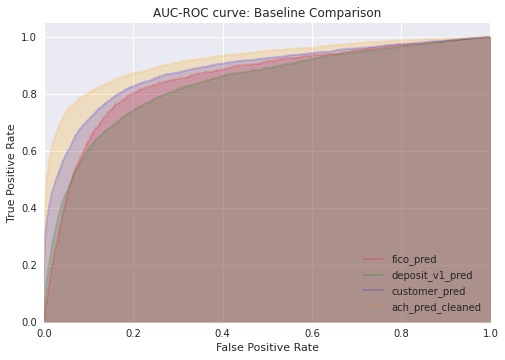

In [26]:
title = 'AUC-ROC curve: Baseline Comparison'
plot_auc_curve_mult(df_w_fico[target_col], preds,
                   title=title, colors = ['r', 'g', 'b', 'orange'])

### Save data
---

In [27]:
modeling_df['pred'] = modeling_df['ach_pred_cleaned']

In [28]:
modeling_df.to_parquet('../../artifacts/final/modeling_df_w_preds.parquet')